In [1]:
from numpy import *
import matplotlib.pyplot as plt

# data set 생성 함수
def loadDataSet(fileName):      
    dataMat = []                
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')        
        
        blankList = [] # 빈 list
        for data in curLine :        
            # float casting -> list append      
            fltCasting = float(data)
            blankList.append(fltCasting)      
            
        dataMat.append(blankList) 
    return dataMat

In [2]:
dataSet = mat(loadDataSet('C:/Users/hyebin/Desktop/Python_ML/chap09_Cluster/data/testSet.txt'))
print(dataSet); print(type(dataSet))

[[ 1.658985  4.285136]
 [-3.453687  3.424321]
 [ 4.838138 -1.151539]
 [-5.379713 -3.362104]
 [ 0.972564  2.924086]
 [-3.567919  1.531611]
 [ 0.450614 -3.302219]
 [-3.487105 -1.724432]
 [ 2.668759  1.594842]
 [-3.156485  3.191137]
 [ 3.165506 -3.999838]
 [-2.786837 -3.099354]
 [ 4.208187  2.984927]
 [-2.123337  2.943366]
 [ 0.704199 -0.479481]
 [-0.39237  -3.963704]
 [ 2.831667  1.574018]
 [-0.790153  3.343144]
 [ 2.943496 -3.357075]
 [-3.195883 -2.283926]
 [ 2.336445  2.875106]
 [-1.786345  2.554248]
 [ 2.190101 -1.90602 ]
 [-3.403367 -2.778288]
 [ 1.778124  3.880832]
 [-1.688346  2.230267]
 [ 2.592976 -2.054368]
 [-4.007257 -3.207066]
 [ 2.257734  3.387564]
 [-2.679011  0.785119]
 [ 0.939512 -4.023563]
 [-3.674424 -2.261084]
 [ 2.046259  2.735279]
 [-3.18947   1.780269]
 [ 4.372646 -0.822248]
 [-2.579316 -3.497576]
 [ 1.889034  5.1904  ]
 [-0.798747  2.185588]
 [ 2.83652  -2.658556]
 [-3.837877 -3.253815]
 [ 2.096701  3.886007]
 [-2.709034  2.923887]
 [ 3.367037 -3.184789]
 [-2.121479

In [3]:
# 유클리드안 거리 계산 함수 
def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) 

# # cluster 중심 생성 함수 
def randCent(dataSet, k):
    n = shape(dataSet)[1] # data set column 수 
    centroids = mat(zeros((k,n)))#create centroid mat->(2,2)
     
    # cluster 중심 생성 : random으로 군집의 중심 생성 
    for j in range(n):
        minJ = min(dataSet[:,j]) 
        rangeJ = float(max(dataSet[:,j]) - minJ)
        r = random.rand(k,1) 
        centroids[:,j] = mat(minJ + rangeJ * r)
         
    return centroids

In [4]:
# k 평균 군집화 알고리즘 
def kMeans(dataSet, k):    
    m = shape(dataSet)[0] # 80    
    # data point의 centroid를 저장을 위한 mat 생성 
    clusterAssment = mat(zeros((m, 2))) # (80, 2)
    centroids = randCent(dataSet, k) # cluster 중심 생성(0~3)
    clusterChanged = True
    
    while clusterChanged:
        clusterChanged = False
        # 각 점을 가장 가까운 중심에 assign 
        for i in range(m):
            minDist = inf; minIndex = -1
            for j in range(k):
                # cluster 중심과 모든 point와 거리 계산 
                distJI = distEclud(centroids[j,:], dataSet[i,:])
                # 가장 거리가 가까운 값으로 minDist, minIndex 수정     
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j

            # i번째행의 첫번째 칼럼과 minIndex가 다르면 반복              
            if clusterAssment[i,0] != minIndex : 
                clusterChanged = True 
                
            # cluster의 centroid 저장 : [minIndex, 최소거리제곱]    
            clusterAssment[i, :] = minIndex, minDist**2
        
        # cluster 중심 다시 계산         
        for center in range(k): # 0 ~ 3
            # 현재 cluster의 모든 point data 가져오기
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==center)[0]]
    
            centroids[center,:] = mean(ptsInClust, axis=0) 
    return centroids, clusterAssment

centroids, clusterAssment = kMeans(dataSet, 4) # k=4 : k 중심 생성  

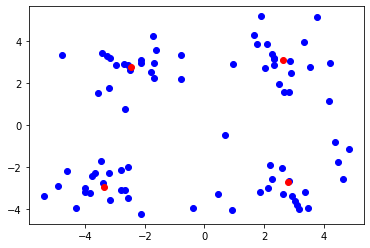

In [5]:
# k 평균 군집화 cluster 산점도 그리기
flg = plt.figure() # 차트 플롯 생성 
chart = flg.add_subplot(1,1,1) # 행,열,위치 
 
x_data = [x[:,0] for x in dataSet] # 첫번째 칼럼 전체 
y_data = [x[:,1] for x in dataSet] # 두번째 칼럼 전체 
chart.scatter(x_data, y_data, c='b')

x_cent = [x[:,0] for x in centroids] # 첫번째 칼럼 전체 
y_cent = [x[:,1] for x in centroids] # 두번째 칼럼 전체 
chart.scatter(x_cent, y_cent, c='r')    
plt.show()

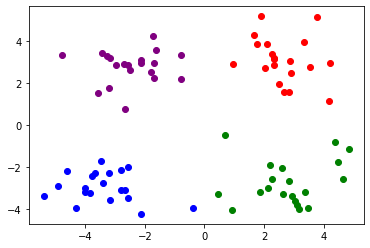

In [6]:
####################################
# k=4인 경우 dataSet 4개 영역 구분 
####################################
# clusterAssment의 첫번째 칼럼 이용 

k = 4
flg = plt.figure() # 차트 플롯 생성 
chart = flg.add_subplot(1,1,1) # 행,열,위치
colors = ['r', 'g', 'b', 'purple']

for idx in range(k) :
    temp = dataSet[nonzero(clusterAssment[:,0]== idx)[0]]
    
    x_cent = [x[:,0] for x in temp] # 첫번째 칼럼 전체 
    y_cent = [x[:,1] for x in temp] # 두번째 칼럼 전체 
    chart.scatter(x_cent, y_cent, c=colors[idx])    

plt.show() 